# Assignment 7: Data Visualization

## Overview
This assignment covers the essential tools for data visualization: matplotlib fundamentals, seaborn statistical plots, pandas plotting, and visualization best practices.

## Setup

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Set style
plt.style.use('default')
sns.set_style('whitegrid')

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: matplotlib Fundamentals

### Part 1.1: Basic Figures and Subplots

**TODO: Create a figure with 2x2 subplots showing different plot types**

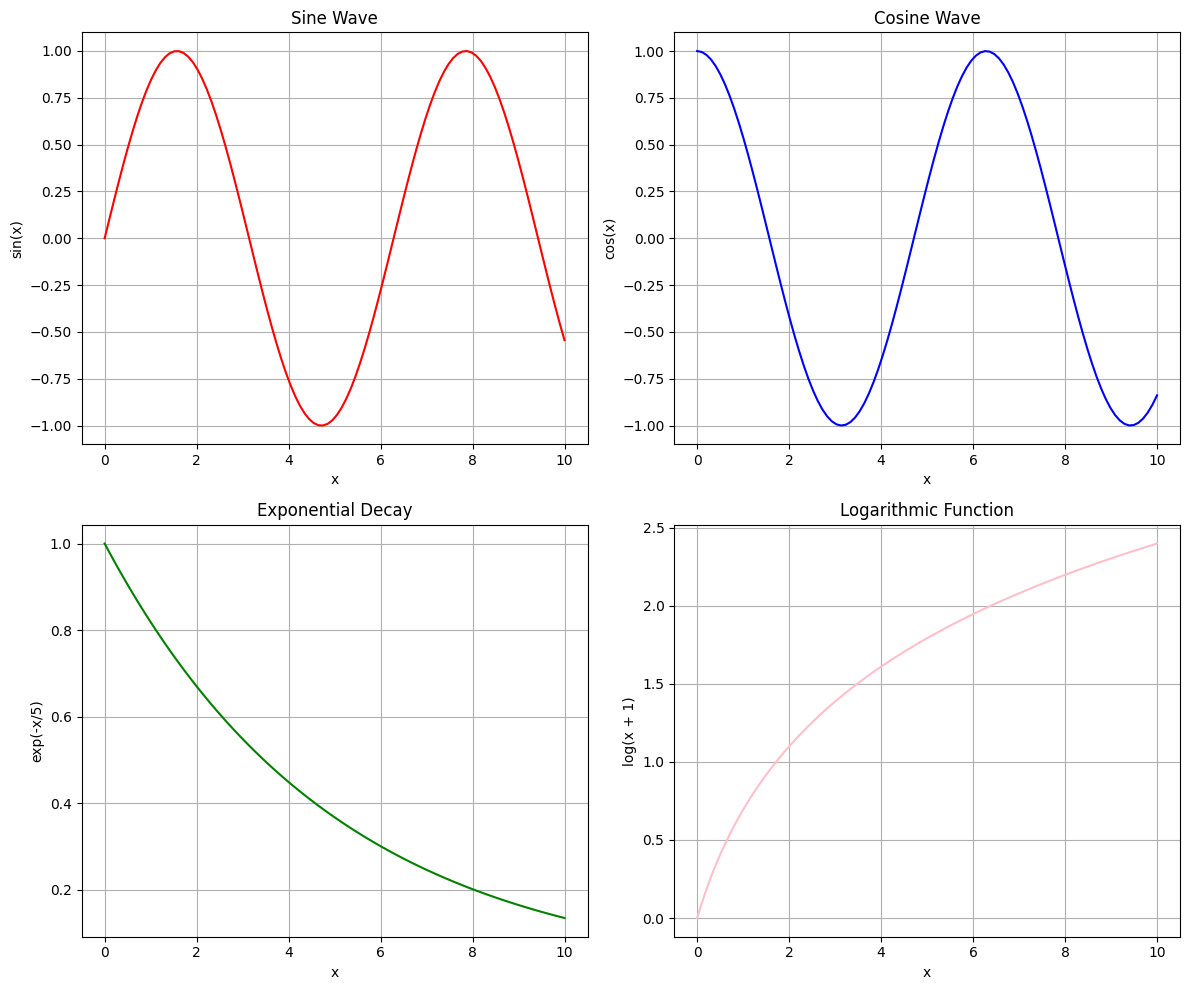

In [241]:
# Default Style
plt.style.use('default')

# Create sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/5)
y4 = np.log(x + 1)

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Sine wave
axes[0, 0].plot(x, y1, color = 'Red')
axes[0, 0].set_title('Sine Wave')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('sin(x)')
axes[0, 0].grid(True)

# Top-right: Cosine wave  
axes[0, 1].plot(x, y2, color = 'Blue')
axes[0, 1].set_title('Cosine Wave')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('cos(x)')
axes[0, 1].grid(True)

# Bottom-left: Exponential decay
axes[1, 0].plot(x, y3, color = 'Green')
axes[1, 0].set_title('Exponential Decay')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('exp(-x/5)')
axes[1, 0].grid(True)

# Bottom-right: Logarithmic function
axes[1, 1].plot(x, y4, color = 'Pink')
axes[1, 1].set_title('Logarithmic Function')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('log(x + 1)')
axes[1, 1].grid(True)

# Output
plt.tight_layout()
plt.savefig('output/q1_matplotlib_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Part 1.2: Plot Customization

**TODO: Create a customized line plot with multiple series**

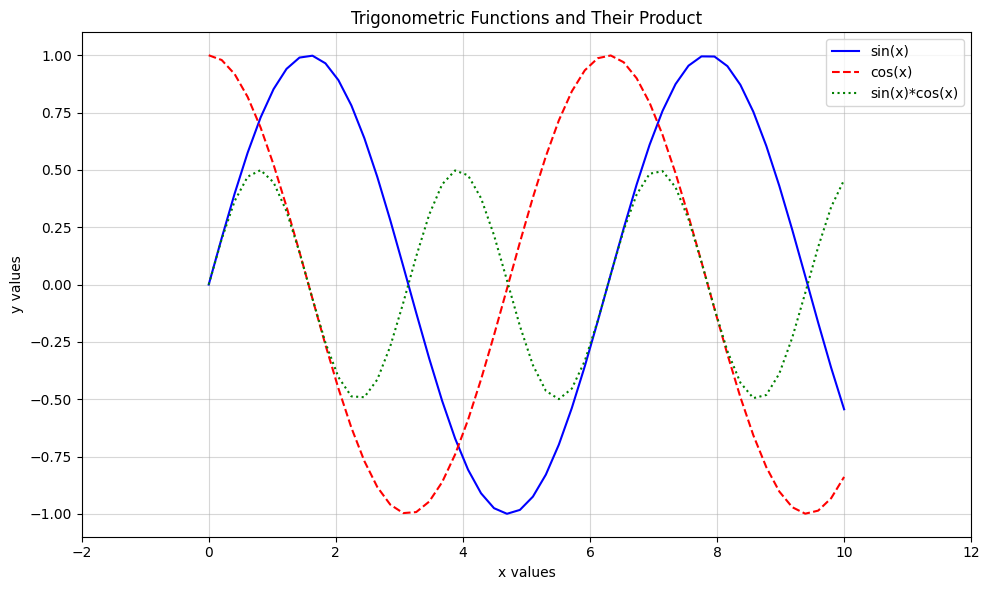

In [242]:
# Create sample data
x = np.linspace(0, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# Create a figure with custom styling
fig, ax = plt.subplots(figsize=(10, 6))

# Line 1: Solid line, blue color, label 'sin(x)'
ax.plot(x, y1, label = 'sin(x)', color = 'blue')

# Line 2: Dashed line, red color, label 'cos(x)'
ax.plot(x, y2, label = 'cos(x)', color = 'red', linestyle = '--')  

# Line 3: Dotted line, green color, label 'sin(x)*cos(x)'
ax.plot(x, y3, label = 'sin(x)*cos(x)', color = 'green', linestyle = ':')

# Add title, xlabel, ylabel
ax.set_title('Trigonometric Functions and Their Product')
ax.set_xlabel('x values')
ax.set_ylabel('y values')

# Add legend
ax.legend()

# Add grid with transparency
ax.grid(True, alpha = 0.5)

# Set appropriate axis limits
ax.set_xlim(-2, 12)

# Plot
plt.tight_layout()


### Part 1.3: Different Plot Types

**TODO: Create a comprehensive visualization with multiple plot types**

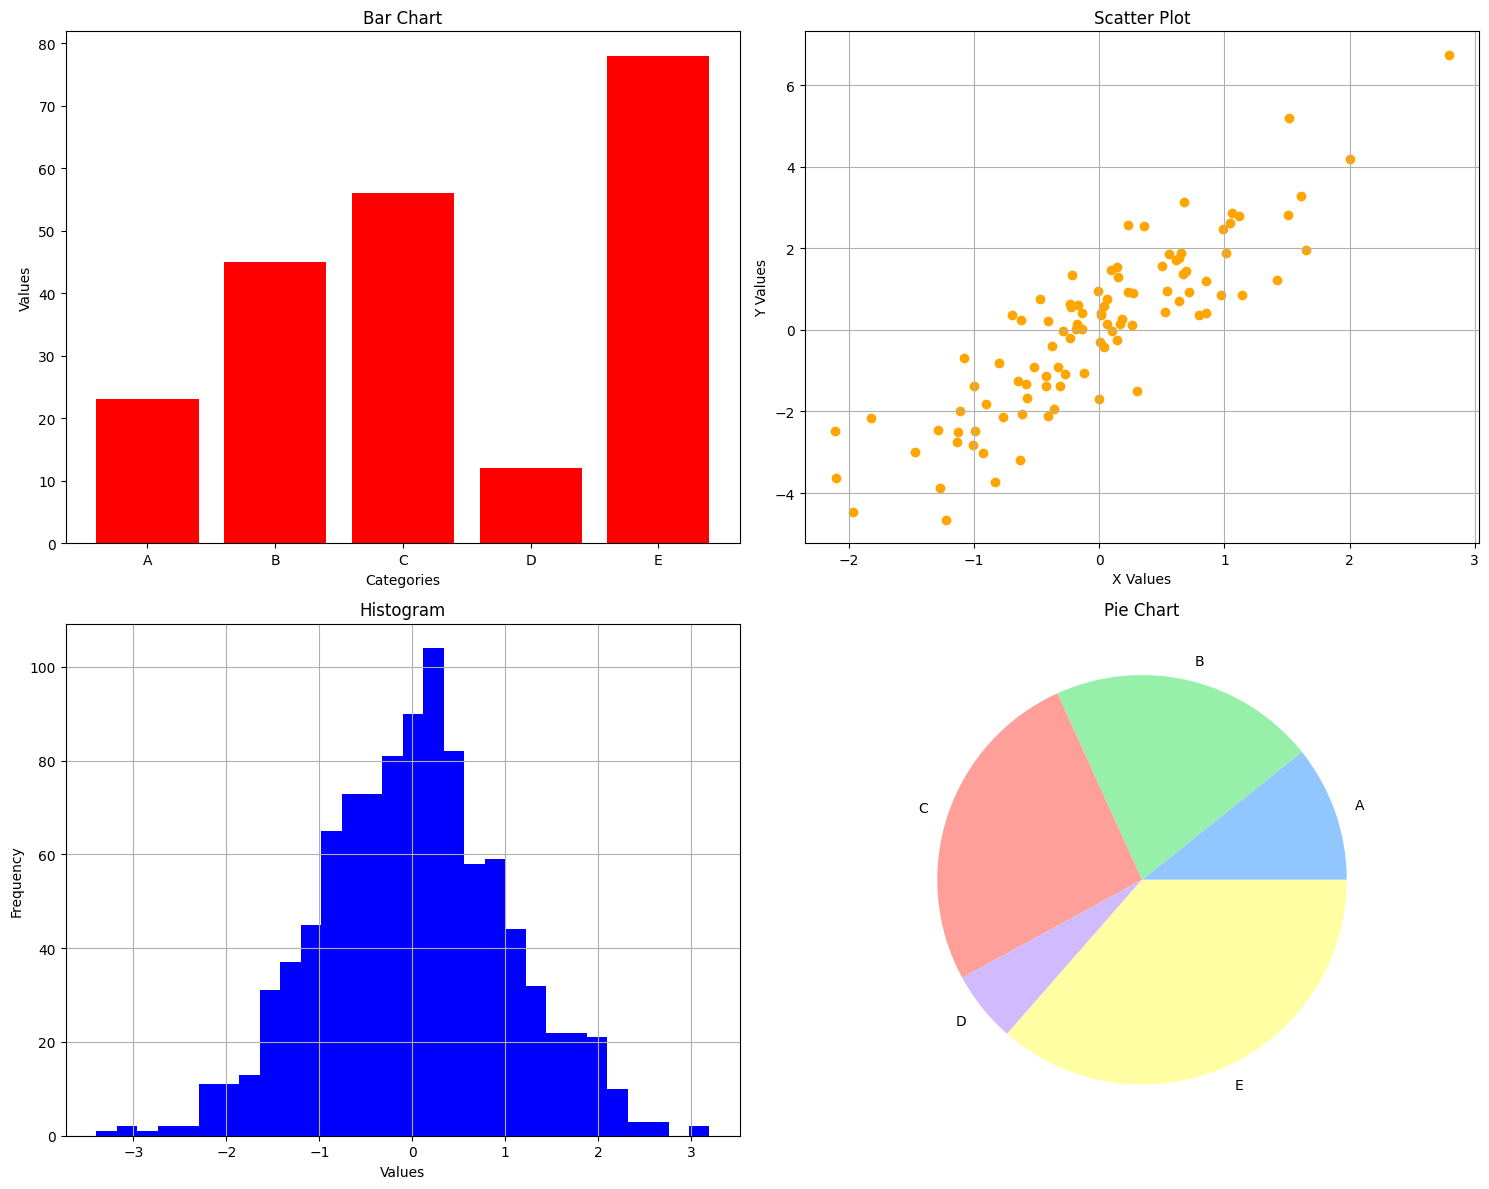

In [243]:
# Custom Style
plt.style.use('seaborn-v0_8-pastel')

# Create sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 12, 78]
x_scatter = np.random.randn(100)
y_scatter = 2 * x_scatter + np.random.randn(100)
hist_data = np.random.normal(0, 1, 1000)

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top-left: Bar chart
axes[0, 0].bar(categories, values, color = 'Red')
axes[0, 0].set_title('Bar Chart')
axes[0, 0].set_xlabel('Categories')
axes[0, 0].set_ylabel('Values')

# Top-right: Scatter plot
axes[0, 1].scatter(x_scatter, y_scatter, color = 'Orange')
axes[0 ,1].set_title('Scatter Plot')
axes[0, 1].set_xlabel('X Values')
axes[0, 1].set_ylabel('Y Values')
axes[0, 1].grid(True)

# Bottom-left: Histogram
axes[1, 0].hist(hist_data, bins = 30, color = 'Blue')
axes[1, 0].set_title('Histogram')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)

# Bottom-right: Pie chart
axes[1, 1].pie(values, labels = categories)
axes[1, 1].set_title('Pie Chart')

# Output
plt.tight_layout()
plt.savefig('output/q1_multi_panel.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 2: seaborn Statistical Visualization

### Part 2.1: Load and Explore Data

In [244]:
# Load the sales data
sales_df = pd.read_csv('data/sales_data.csv')
customer_df = pd.read_csv('data/customer_data.csv')
product_df = pd.read_csv('data/product_data.csv')

# Merge data for analysis
merged_df = sales_df.merge(customer_df, on='customer_id').merge(product_df, on='product_id')

print("Data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())
print("\nFirst few rows:")
print(merged_df.head())

Data shape: (1000, 19)

Columns: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'unit_price_x', 'total_amount', 'transaction_date', 'store_location', 'customer_name', 'age', 'gender', 'city', 'state', 'registration_date', 'product_name', 'category', 'brand', 'unit_price_y', 'stock_quantity']

First few rows:
  transaction_id customer_id product_id  quantity  unit_price_x  total_amount  \
0          T0001       C0103       P040        10    229.359978   2293.599785   
1          T0002       C0180       P083         3     75.794677    227.384031   
2          T0003       C0093       P042         5    479.387719   2396.938597   
3          T0004       C0015       P041         5    269.533265   1347.666324   
4          T0005       C0107       P006         4    128.527714    514.110856   

  transaction_date store_location customer_name  age gender         city  \
0       2025-10-15          South  Customer 103   23      F       Dallas   
1       2025-07-27          North  Cus

### Part 2.2: Statistical Plots

**TODO: Create statistical visualizations with seaborn**

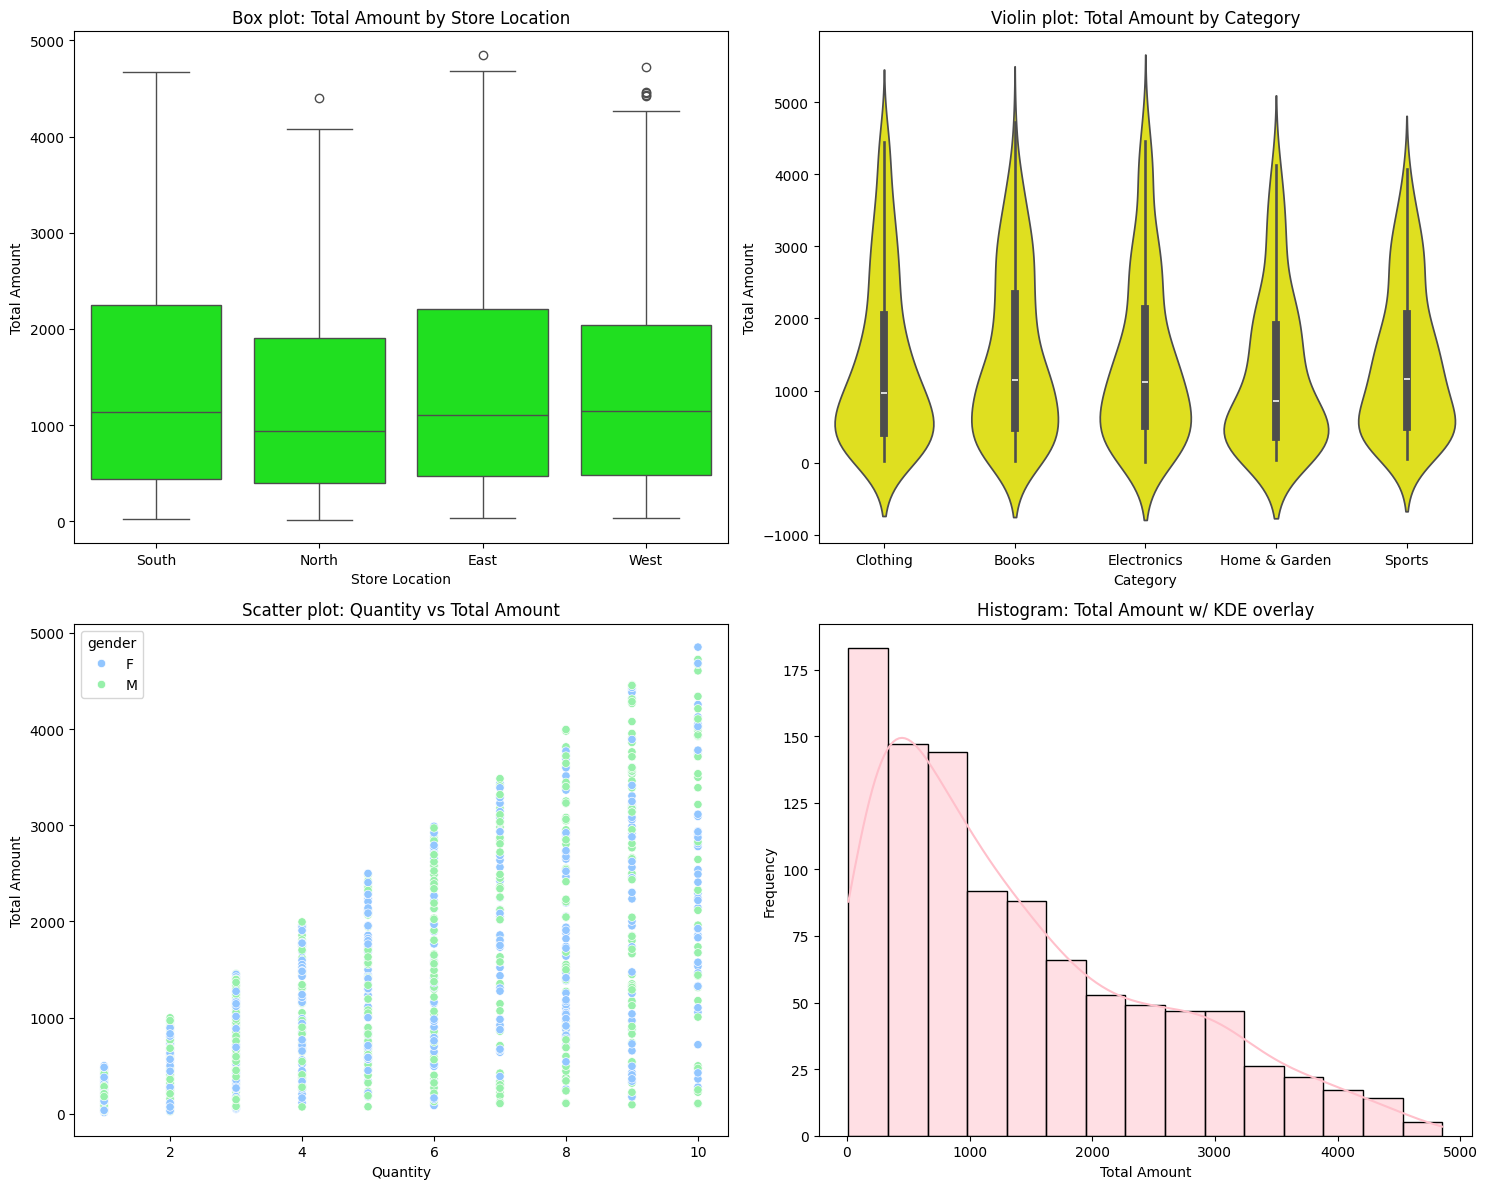

In [245]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top-left: Box plot of total_amount by store_location
sns.boxplot(
    data = merged_df, 
    x = 'store_location', 
    y = 'total_amount', 
    ax = axes[0, 0],
    color = 'Lime'
    )
axes[0, 0].set_title('Box plot: Total Amount by Store Location')
axes[0, 0].set_xlabel('Store Location')
axes[0, 0].set_ylabel('Total Amount')

# Top-right: Violin plot of total_amount by category
sns.violinplot(
    data = merged_df, 
    x = 'category', 
    y = 'total_amount', 
    ax = axes[0, 1],
    color = 'Yellow'
    )
axes[0, 1].set_title('Violin plot: Total Amount by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Total Amount')

# Bottom-left: Scatter plot of quantity vs total_amount with hue by gender
sns.scatterplot(
    data = merged_df, 
    x = 'quantity', 
    y = 'total_amount', 
    hue = 'gender', 
    ax = axes[1, 0],
    )
axes[1, 0].set_title('Scatter plot: Quantity vs Total Amount')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Total Amount')

# Bottom-right: Histogram of total_amount with kde overlay
sns.histplot(
    data = merged_df, 
    x = 'total_amount', 
    kde = True, 
    ax = axes[1, 1],
    color = 'Pink'
    )
axes[1, 1].set_title('Histogram: Total Amount w/ KDE overlay')
axes[1, 1].set_xlabel('Total Amount')
axes[1, 1].set_ylabel('Frequency')

# Output
plt.tight_layout()
plt.savefig('output/q2_seaborn_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Part 2.3: Correlation Analysis

**TODO: Create a correlation heatmap**

Available columns: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'unit_price_x', 'total_amount', 'transaction_date', 'store_location', 'customer_name', 'age', 'gender', 'city', 'state', 'registration_date', 'product_name', 'category', 'brand', 'unit_price_y', 'stock_quantity']
Data types:
transaction_id        object
customer_id           object
product_id            object
quantity               int64
unit_price_x         float64
total_amount         float64
transaction_date      object
store_location        object
customer_name         object
age                    int64
gender                object
city                  object
state                 object
registration_date     object
product_name          object
category              object
brand                 object
unit_price_y         float64
stock_quantity         int64
dtype: object


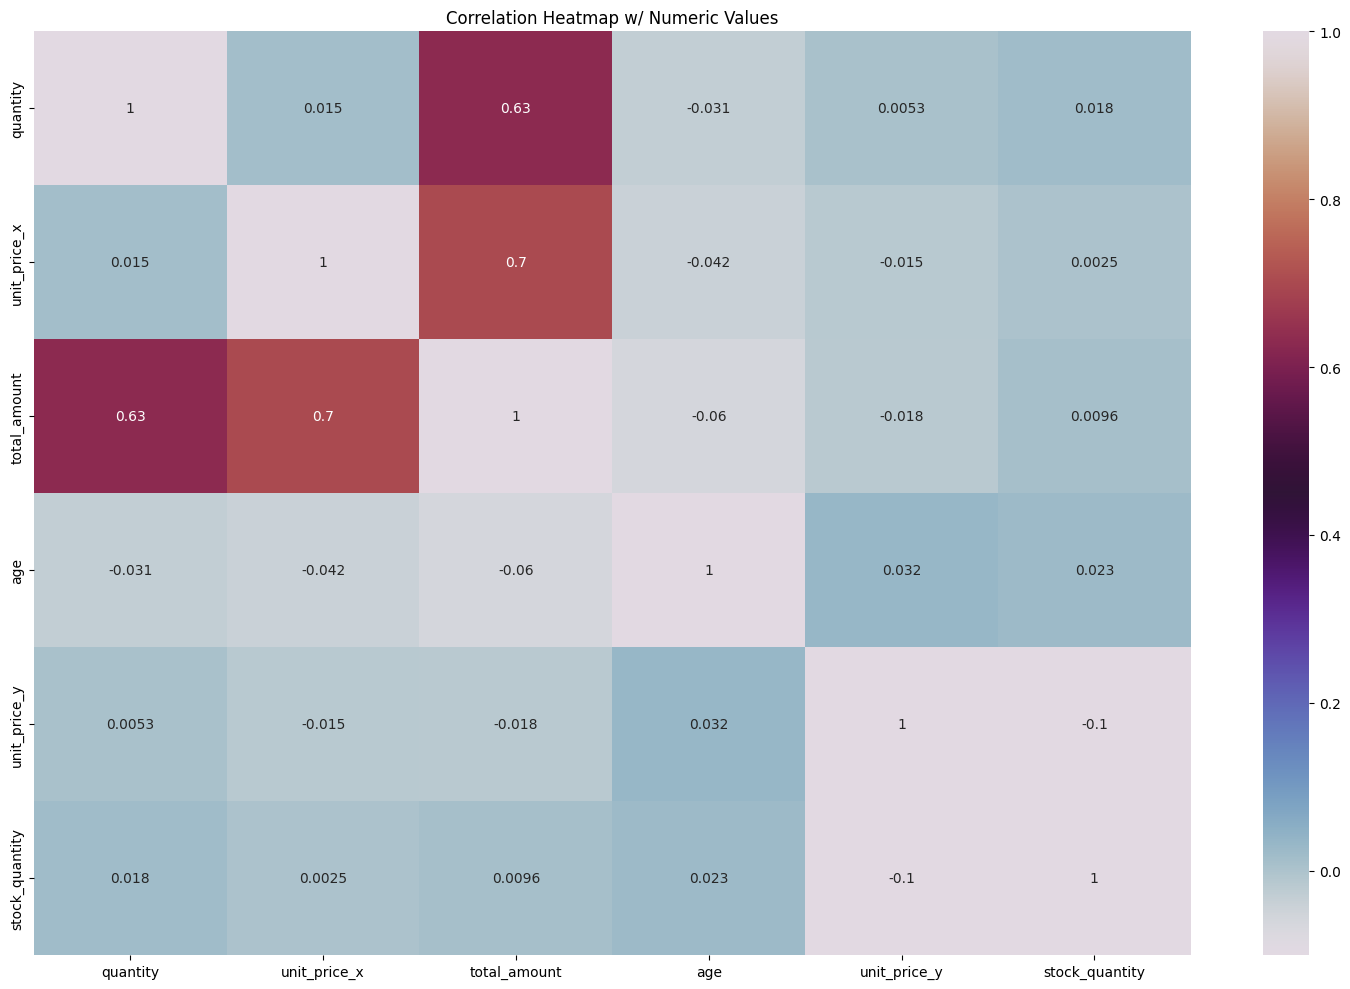

In [246]:
# Explore the merged data to see what columns are available
print("Available columns:", merged_df.columns.tolist())
print("Data types:")
print(merged_df.dtypes)

# Use numeric columns for correlation analysis
numeric_cols = merged_df.select_dtypes(include = 'number')  

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Create heatmap with seaborn
plt.figure(figsize = (15, 10))
sns.heatmap(
    correlation_matrix, 
    annot = True, 
    cmap = 'twilight',

    )
plt.title('Correlation Heatmap w/ Numeric Values')

# Output
plt.tight_layout()
plt.savefig('output/q2_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 3: pandas Plotting and Data Exploration

### Part 3.1: Time Series Visualization

**TODO: Create time series plots with pandas**

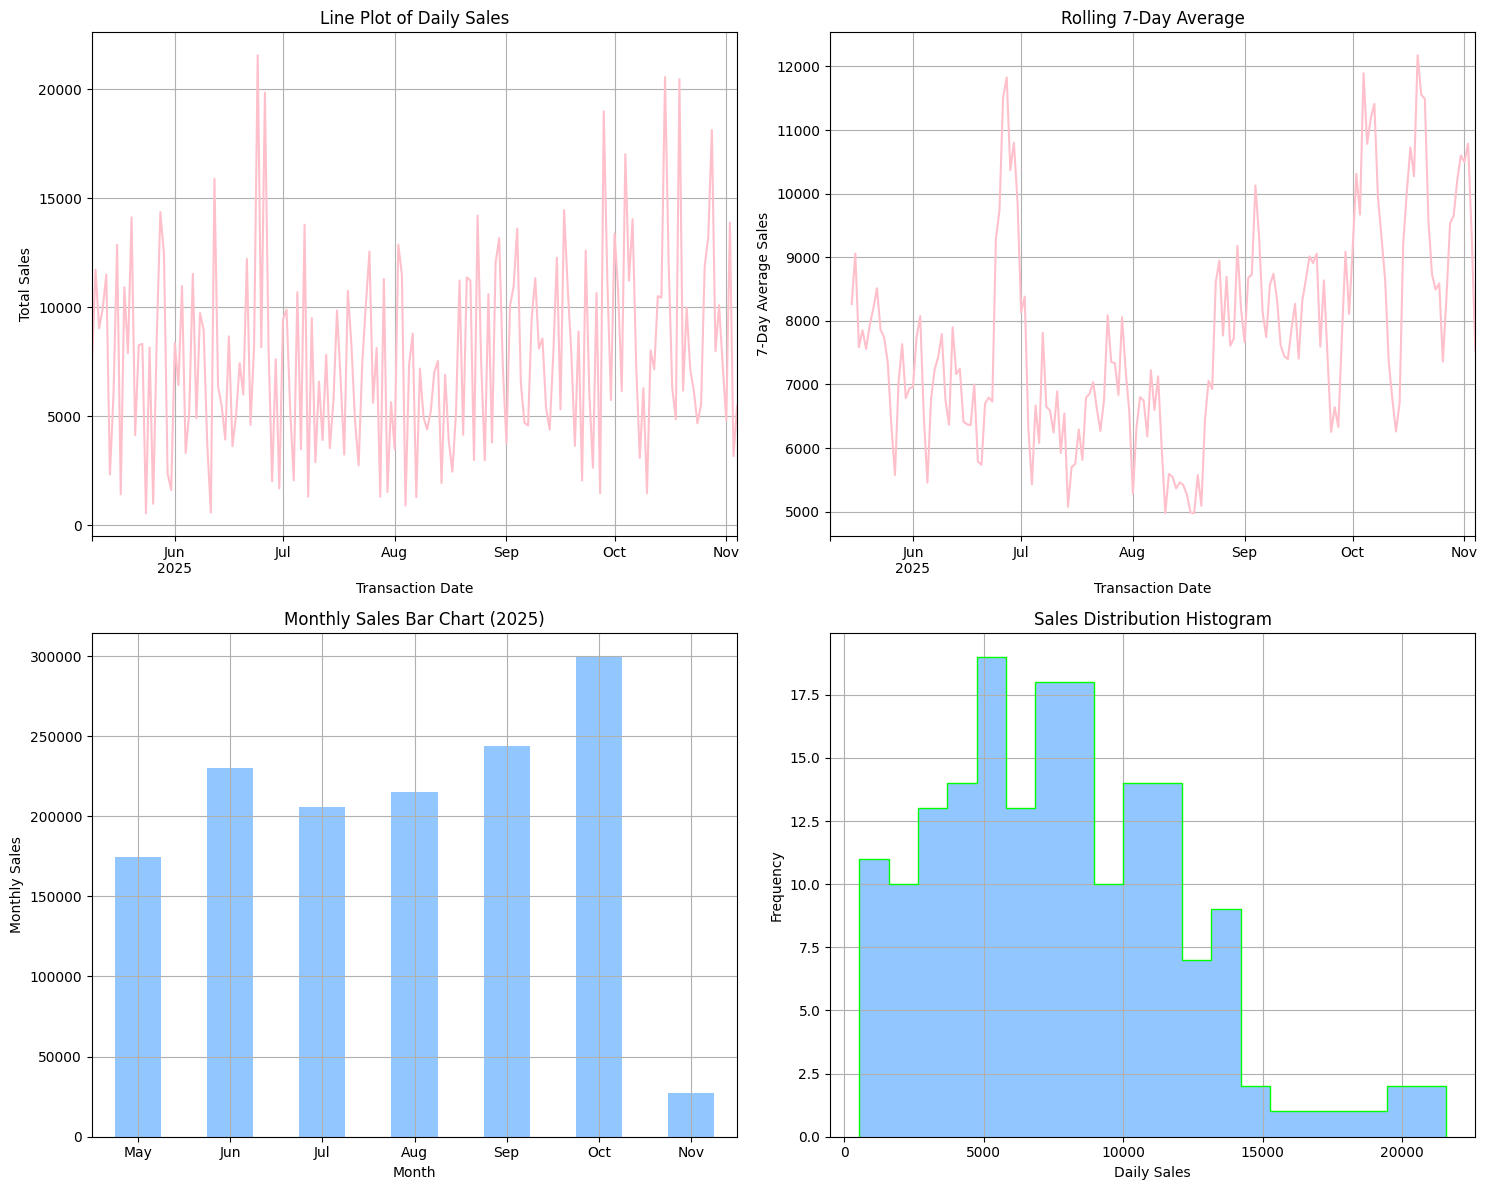

In [247]:
# Convert transaction_date to datetime
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

# Create daily sales aggregation
daily_sales = merged_df.groupby('transaction_date')['total_amount'].sum()

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top-left: Line plot of daily sales
daily_sales.plot(
    ax = axes[0, 0], 
    title = 'Line Plot of Daily Sales',
    xlabel = 'Transaction Date',
    ylabel = 'Total Sales',
    color = 'Pink',
    grid = True
    )
axes[0, 0].minorticks_off()


# Top-right: Rolling 7-day average
roll = daily_sales.rolling(window = 7).mean()
roll.plot(
    ax = axes[0, 1], 
    title = 'Rolling 7-Day Average',
    xlabel = 'Transaction Date',
    ylabel = '7-Day Average Sales',
    color = 'Pink',
    grid = True
    )
axes[0, 1].minorticks_off()

# Bottom-left: Monthly sales bar chart 
monthly_sales = daily_sales.resample('ME').sum()
monthly_sales.plot(
    ax = axes[1, 0], 
    kind = 'bar',
    title = 'Monthly Sales Bar Chart (2025)',
    xlabel = 'Month',
    ylabel = 'Monthly Sales',
    grid = True
    )
axes[1, 0].set_xticklabels([date.strftime('%b') for date in monthly_sales.index], rotation = 0)

# Bottom-right: Sales distribution histogram
daily_sales.plot(
    ax = axes[1, 1], 
    kind = 'hist', 
    bins = 20,
    title = 'Sales Distribution Histogram'
    )
daily_sales.plot(
    ax = axes[1, 1], 
    kind = 'hist', 
    bins = 20,
    histtype = 'step',
    color = 'Lime',
    xlabel = 'Daily Sales'
    )
axes[1, 1].grid(True)

# Output
plt.tight_layout()
plt.savefig('output/q3_pandas_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Part 3.2: Data Overview Dashboard

**TODO: Create a comprehensive data overview**

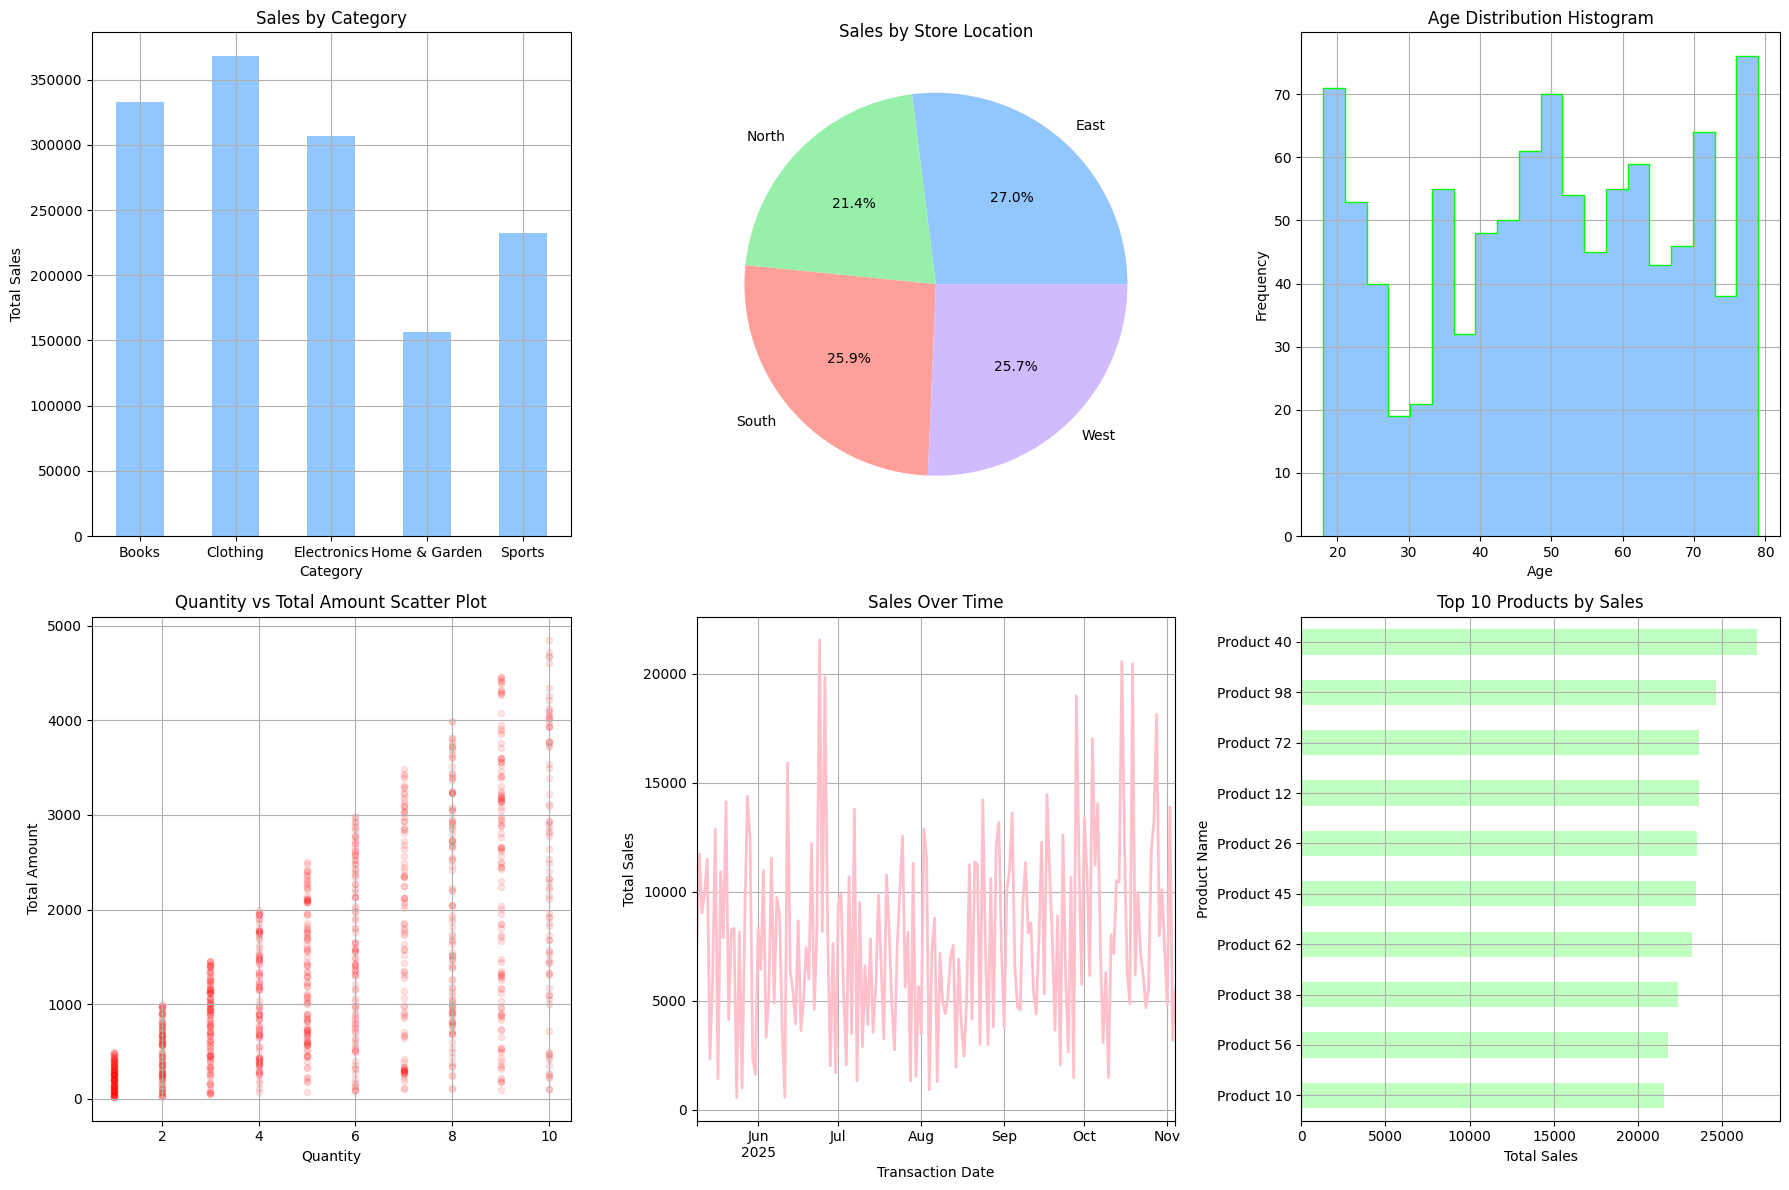

In [248]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#  Plot 1: Sales by category (bar chart)
sales_category = merged_df.groupby('category')['total_amount'].sum()
sales_category.plot(
    ax = axes[0, 0],
    kind = 'bar',
    title = 'Sales by Category',
    xlabel = 'Category',
    ylabel = 'Total Sales',
    rot = 0,
    grid = True
    )

# Plot 2: Sales by store location (pie chart)
sales_location = merged_df.groupby('store_location')['total_amount'].sum()
sales_location.plot(
    ax = axes[0, 1],
    kind = 'pie',
    autopct = '%1.1f%%',
    title = 'Sales by Store Location',
    ylabel = ''
    )

# Plot 3: Age distribution (histogram)
merged_df['age'].plot(
    ax = axes[0, 2],
    kind = 'hist',
    bins = 20,
    title = 'Age Distribution Histogram'
)
merged_df['age'].plot(
    ax = axes[0, 2],
    kind = 'hist',
    bins = 20,
    title = 'Age Distribution Histogram',
    histtype = 'step',
    color = 'Lime',
    xlabel = 'Age',
    grid = True
)

# Plot 4: Quantity vs total_amount scatter
merged_df.plot(
    ax = axes[1, 0],
    kind = 'scatter',
    x = 'quantity',
    y = 'total_amount',
    color = 'Red',
    title = 'Quantity vs Total Amount Scatter Plot',
    xlabel = 'Quantity',
    ylabel = 'Total Amount',
    alpha = 0.1,
    grid = True
)
# Plot 5: Sales over time (line plot)
daily_sales.plot(
    ax = axes[1, 1], 
    title = 'Sales Over Time',
    xlabel = 'Transaction Date',
    ylabel = 'Total Sales',
    color = 'Pink',
    lw = 2,
    grid = True
    )
axes[1, 1].minorticks_off()

# Plot 6: Top 10 products by sales (horizontal bar)
product_sales = merged_df.groupby('product_name')['total_amount'].sum().nlargest(10).sort_values()
product_sales.plot(
    ax = axes[1, 2],
    kind = 'barh',
    color = 'lime',
    alpha = 0.25,
    title = 'Top 10 Products by Sales',
    xlabel = 'Total Sales',
    ylabel = 'Product Name',
    grid = True
)

# Output
plt.tight_layout()
plt.savefig('output/q3_data_overview.png', dpi=300, bbox_inches='tight')
plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_matplotlib_plots.png` - matplotlib fundamentals
- [ ] `output/q1_multi_panel.png` - multi-panel visualization  
- [ ] `output/q2_seaborn_plots.png` - seaborn statistical plots
- [ ] `output/q2_correlation_heatmap.png` - correlation analysis
- [ ] `output/q3_pandas_plots.png` - pandas plotting
- [ ] `output/q3_data_overview.png` - data exploration

## Key Learning Objectives

- Master matplotlib fundamentals for custom plots
- Create statistical visualizations with seaborn
- Use pandas plotting for quick exploration
- Apply visualization best practices
- Choose appropriate chart types for different data